In [20]:
from os import path
import codecs
import json
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from scipy.misc import imread

In [2]:
review_filepath = 'yelp_academic_dataset_review.json'
review_1star_filepath = 'review_1star.txt'
review_3star_filepath = 'review_3star.txt'
with codecs.open(review_1star_filepath, 'w', encoding='utf_8') as review_1star_file:
    with codecs.open(review_3star_filepath, 'w', encoding='utf_8') as review_3star_file:
        with codecs.open(review_filepath, encoding='utf_8') as review_file:
            for review_json in review_file:
                review = json.loads(review_json)
                if (review[u'stars'] == 1) or (review[u'stars'] == 2):
                    review_1star_file.write(review[u'text'].replace('\n', ' ').replace('\r', ' ') + '\n')
                elif (review[u'stars'] == 4) or (review[u'stars'] == 5):
                    review_3star_file.write(review[u'text'].replace('\n', ' ').replace('\r', ' ') + '\n')

In [10]:
mini='result-3categories-minidata-v2/review_text.txt'

In [7]:
stopwords = STOPWORDS.copy()
stopwords.add("food")
stopwords.add("place")

In [21]:
mask = imread("thumbs-down.png")
image_colors = ImageColorGenerator(mask)

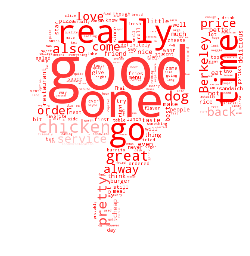

In [22]:
review_1star_text = open(mini).read()
wordcloud = WordCloud(background_color="white", mask=mask, stopwords=stopwords).generate(review_1star_text)
plt.imshow(wordcloud.recolor(color_func=image_colors))
plt.axis("off")
plt.show()